In [2]:
import pandas as pd
import zipfile
import urllib.request
import os

# Step 1: Download and extract the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
zip_path = "student.zip"

# Download the file
urllib.request.urlretrieve(url, zip_path)

# Extract only 'student-mat.csv'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extract('student-mat.csv')

# Step 2: Load the CSV file (semicolon-separated)
df = pd.read_csv('student-mat.csv', sep=';')

# Step 3: Preview the data
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [5]:
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

0: school
1: sex
2: age
3: address
4: famsize
5: Pstatus
6: Medu
7: Fedu
8: Mjob
9: Fjob
10: reason
11: guardian
12: traveltime
13: studytime
14: failures
15: schoolsup
16: famsup
17: paid
18: activities
19: nursery
20: higher
21: internet
22: romantic
23: famrel
24: freetime
25: goout
26: Dalc
27: Walc
28: health
29: absences
30: G1
31: G2
32: G3


In [6]:
# Selected features for the model
selected_columns = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
    'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime', 'studytime', 
    'failures', 'schoolsup', 'famsup', 'paid', 'activities', 
    'nursery', 'higher', 'internet', 'romantic', 'famrel', 
    'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
    'G1', 'G2', 'G3'
]

# Create a new dataframe with only selected columns
df_selected = df[selected_columns]

# Check the shape
print(f"Original dataset shape: {df.shape}")
print(f"Selected dataset shape: {df_selected.shape}")

Original dataset shape: (395, 33)
Selected dataset shape: (395, 31)


In [7]:
# Let's first identify categorical vs numerical columns
categorical_columns = []
numerical_columns = []

for col in df_selected.columns:
    if df_selected[col].dtype == 'object':  # String/categorical columns
        categorical_columns.append(col)
    else:  # Numerical columns
        numerical_columns.append(col)

print("Categorical columns (need one-hot encoding):")
print(categorical_columns)
print("\nNumerical columns:")
print(numerical_columns)

Categorical columns (need one-hot encoding):
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Numerical columns:
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: One-Hot Encoding for categorical columns
print("Before one-hot encoding:", df_selected.shape)

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df_selected, columns=categorical_columns, drop_first=True)

print("After one-hot encoding:", df_encoded.shape)
print("\nFirst few columns after encoding:")
print(df_encoded.columns.tolist()[:10])  # Show first 10 columns
print("...")
print(df_encoded.columns.tolist()[-10:])  # Show last 10 columns

# Show a sample of the encoded data
print("\nSample of encoded data:")
print(df_encoded.head())

Before one-hot encoding: (395, 31)
After one-hot encoding: (395, 37)

First few columns after encoding:
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc']
...
['Fjob_services', 'Fjob_teacher', 'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes']

Sample of encoded data:
   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  Fjob_services  Fjob_teacher  schoolsup_yes  famsup_yes  \
0     1  ...          False          True           True

In [9]:
# Step 2: Separate features and target, then apply StandardScaler

# Separate target variable (G3) from features
y = df_encoded['G3']  # Target variable
X = df_encoded.drop('G3', axis=1)  # All features except G3

print("Target variable (G3) shape:", y.shape)
print("Features (X) shape:", X.shape)

# Identify numerical columns that need scaling (exclude G3 since it's now the target)
numerical_features_to_scale = [
    'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'
]

# Get one-hot encoded columns (these don't need scaling - they're already 0/1)
categorical_features_encoded = [col for col in X.columns if col not in numerical_features_to_scale]

print(f"\nNumerical features to scale ({len(numerical_features_to_scale)}): {numerical_features_to_scale}")
print(f"Categorical features (already scaled) ({len(categorical_features_encoded)}): {categorical_features_encoded[:5]}...")  # Show first 5

# Apply StandardScaler to numerical features only
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X[numerical_features_to_scale])

# Convert scaled numerical features back to DataFrame
X_numerical_scaled_df = pd.DataFrame(X_numerical_scaled, 
                                   columns=numerical_features_to_scale, 
                                   index=X.index)

# Keep categorical features unchanged
X_categorical = X[categorical_features_encoded]

# Combine scaled numerical + unscaled categorical features
X_final = pd.concat([X_numerical_scaled_df, X_categorical], axis=1)

print(f"\nFinal features shape: {X_final.shape}")
print("Sample of final processed data:")
print(X_final.head())

Target variable (G3) shape: (395,)
Features (X) shape: (395, 36)

Numerical features to scale (15): ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
Categorical features (already scaled) (21): ['school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T']...

Final features shape: (395, 36)
Sample of final processed data:
        age      Medu      Fedu  traveltime  studytime  failures    famrel  \
0  1.023046  1.143856  1.360371    0.792251  -0.042286 -0.449944  0.062194   
1  0.238380 -1.600009 -1.399970   -0.643249  -0.042286 -0.449944  1.178860   
2 -1.330954 -1.600009 -1.399970   -0.643249  -0.042286  3.589323  0.062194   
3 -1.330954  1.143856 -0.479857   -0.643249   1.150779 -0.449944 -1.054472   
4 -0.546287  0.229234  0.440257   -0.643249  -0.042286 -0.449944  0.062194   

   freetime     goout      Dalc  ...  Fjob_services  Fjob_teacher  \
0 -0.236010  0.801479 -0.540699  ...      

In [10]:
# Step 3: Train-Test Split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_final,     # Features (processed)
    y,           # Target (G3)
    test_size=0.2,      # 20% for testing, 80% for training
    random_state=42,    # For reproducible results
    shuffle=True        # Shuffle the data before splitting
)

# Display the shapes of the splits
print("="*50)
print("TRAIN-TEST SPLIT RESULTS")
print("="*50)
print(f"Original dataset shape: {X_final.shape}")
print(f"Target variable shape: {y.shape}")
print()
print("After splitting:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")
print()
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X_final)*100:.1f}%)")
print(f"Testing set:  {len(X_test)} samples ({len(X_test)/len(X_final)*100:.1f}%)")
print()
print("Sample of training features:")
print(X_train.head(3))
print()
print("Sample of training targets:")
print(y_train.head(3))

TRAIN-TEST SPLIT RESULTS
Original dataset shape: (395, 36)
Target variable shape: (395,)

After splitting:
X_train shape: (316, 36)
X_test shape:  (79, 36)
y_train shape: (316,)
y_test shape:  (79,)

Training set: 316 samples (80.0%)
Testing set:  79 samples (20.0%)

Sample of training features:
          age      Medu      Fedu  traveltime  studytime  failures    famrel  \
181 -0.546287  0.229234  0.440257   -0.643249  -0.042286 -0.449944  0.062194   
194 -0.546287 -0.685387  0.440257    0.792251  -1.235351 -0.449944  1.178860   
173 -0.546287 -1.600009  0.440257   -0.643249  -0.042286  3.589323  0.062194   

     freetime     goout      Dalc  ...  Fjob_services  Fjob_teacher  \
181 -1.238419 -0.097908 -0.540699  ...          False         False   
194 -0.236010 -0.097908 -0.540699  ...          False         False   
173 -0.236010  1.700867 -0.540699  ...           True         False   

     schoolsup_yes  famsup_yes  paid_yes  activities_yes  nursery_yes  \
181          False      

LINEAR REGRESSION MODEL PERFORMANCE
Metric          Training Set    Test Set        Difference     
------------------------------------------------------------
R² Score        0.8617          0.7434          0.1183         
MAE             1.1653          1.5671          0.4018         
MSE             2.9043          5.2620          2.3577         
RMSE            1.7042          2.2939          0.5897         

📊 METRIC INTERPRETATION:
• R² Score: 74.3% of variance in final grades explained by the model
• MAE: On average, predictions are off by 1.57 grade points
• RMSE: 2.29 penalizes larger errors more than MAE
⚠️  Large difference between train/test R² suggests possible overfitting


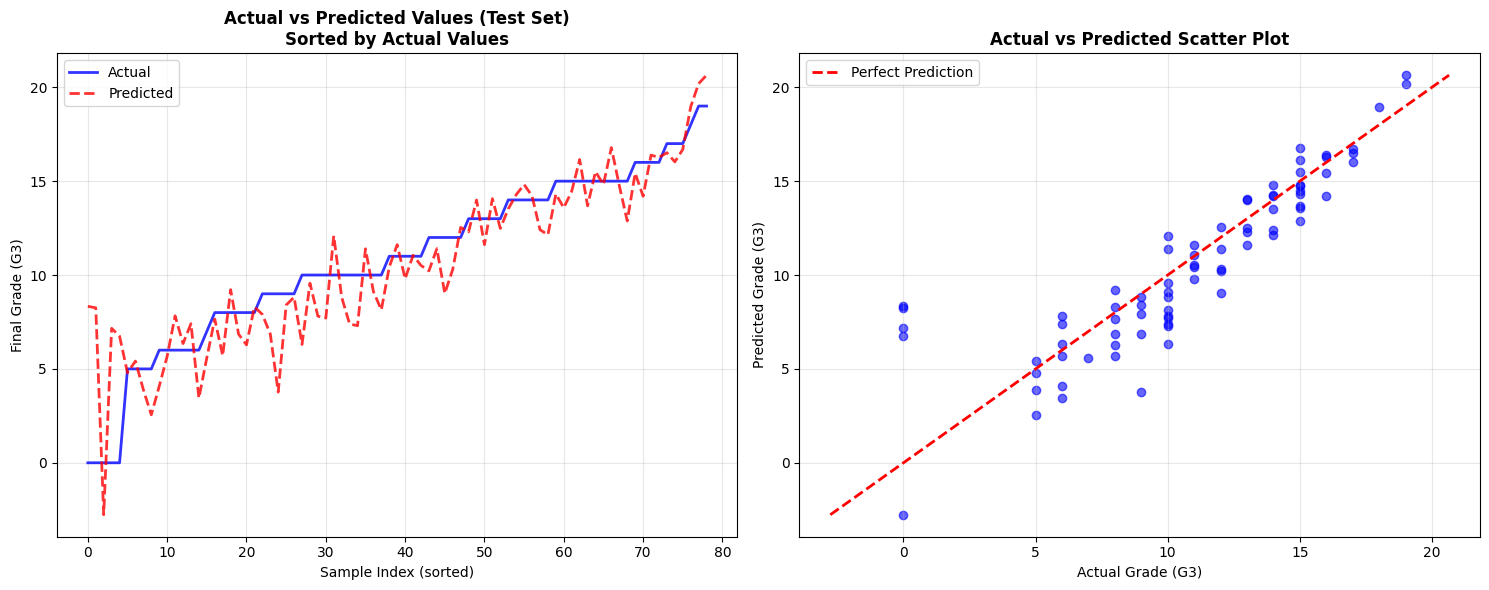

In [13]:
# Step 4: Linear Regression Model Training and Evaluation with Visualization
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

# Calculate evaluation metrics for test set
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

# Display results
print("="*60)
print("LINEAR REGRESSION MODEL PERFORMANCE")
print("="*60)
print(f"{'Metric':<15} {'Training Set':<15} {'Test Set':<15} {'Difference':<15}")
print("-"*60)
print(f"{'R² Score':<15} {train_r2:<15.4f} {test_r2:<15.4f} {abs(train_r2-test_r2):<15.4f}")
print(f"{'MAE':<15} {train_mae:<15.4f} {test_mae:<15.4f} {abs(train_mae-test_mae):<15.4f}")
print(f"{'MSE':<15} {train_mse:<15.4f} {test_mse:<15.4f} {abs(train_mse-test_mse):<15.4f}")
print(f"{'RMSE':<15} {train_rmse:<15.4f} {test_rmse:<15.4f} {abs(train_rmse-test_rmse):<15.4f}")
print("="*60)

# Brief interpretation
print("\n📊 METRIC INTERPRETATION:")
print(f"• R² Score: {test_r2:.1%} of variance in final grades explained by the model")
print(f"• MAE: On average, predictions are off by {test_mae:.2f} grade points")
print(f"• RMSE: {test_rmse:.2f} penalizes larger errors more than MAE")
if abs(train_r2 - test_r2) > 0.1:
    print("⚠️  Large difference between train/test R² suggests possible overfitting")
else:
    print("✅ Good balance between training and test performance")

# Visualizations
plt.figure(figsize=(15, 6))

# 1. Line Chart: Actual vs Predicted (Test Set)
plt.subplot(1, 2, 1)
# Sort by actual values for better line visualization
sorted_indices = np.argsort(y_test)
sorted_actual = y_test.iloc[sorted_indices]
sorted_predicted = y_test_pred[sorted_indices]

plt.plot(range(len(sorted_actual)), sorted_actual, 'b-', label='Actual', linewidth=2, alpha=0.8)
plt.plot(range(len(sorted_predicted)), sorted_predicted, 'r--', label='Predicted', linewidth=2, alpha=0.8)
plt.title('Actual vs Predicted Values (Test Set)\nSorted by Actual Values', fontsize=12, fontweight='bold')
plt.xlabel('Sample Index (sorted)')
plt.ylabel('Final Grade (G3)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Scatter Plot: Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
# Perfect prediction line
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Scatter Plot', fontsize=12, fontweight='bold')
plt.xlabel('Actual Grade (G3)')
plt.ylabel('Predicted Grade (G3)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

RIDGE REGRESSION (RidgeCV) MODEL PERFORMANCE
Best Alpha (regularization): 10.0
------------------------------------------------------------
Metric          Training Set    Test Set        Difference     
------------------------------------------------------------
R² Score        0.8600          0.7524          0.1076         
MAE             1.1516          1.5139          0.3623         
MSE             2.9406          5.0766          2.1360         
RMSE            1.7148          2.2531          0.5383         

🔄 COMPARISON WITH PREVIOUS LINEAR REGRESSION:
Linear Regression - Test R²: 0.7434
Ridge Regression  - Test R²: 0.7524
R² Difference: +0.0090

Overfitting reduction (Train-Test R² gap):
Linear: 0.1183 -> Ridge: 0.1076

📊 METRIC INTERPRETATION:
• R² Score: 75.2% of variance explained
• MAE: On average, predictions are off by 1.51 grade points
⚠️  Still some overfitting present


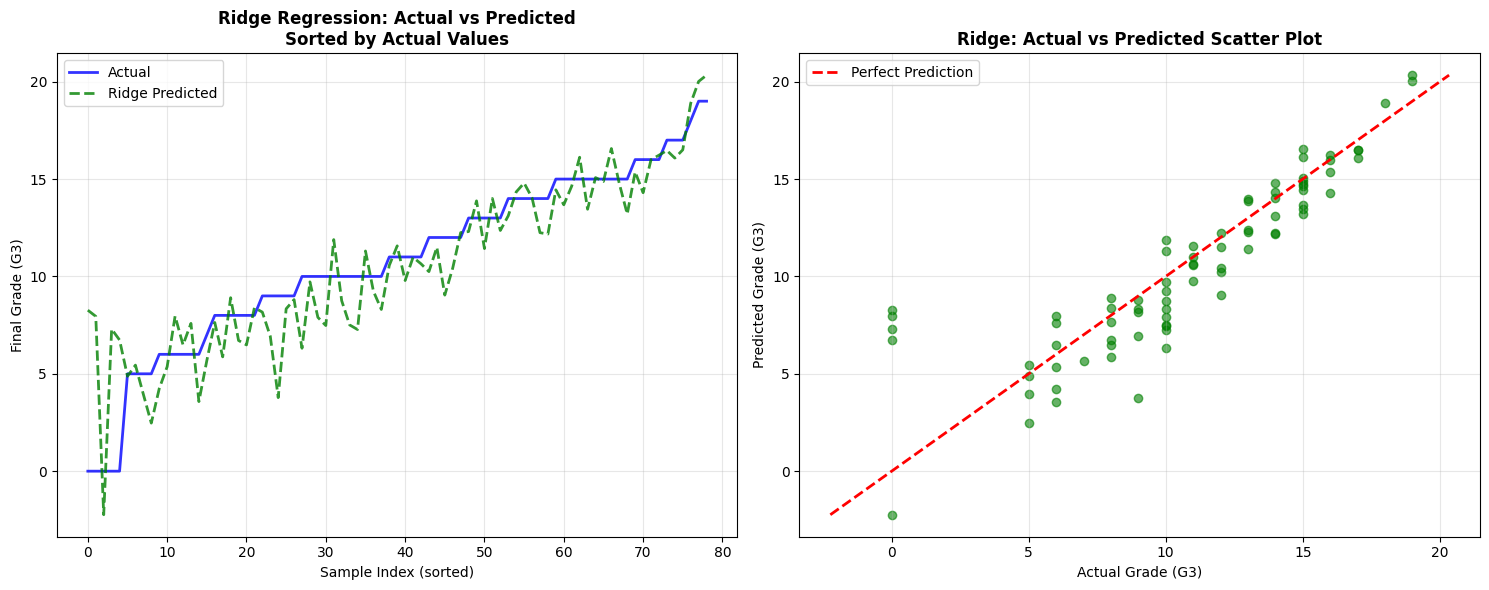

In [14]:
# Ridge Regression with Cross-Validation
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Create RidgeCV model with different alpha values to test
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]  # Regularization strengths
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation

# Train the model
ridge_cv.fit(X_train, y_train)

# Make predictions
y_train_pred_ridge = ridge_cv.predict(X_train)
y_test_pred_ridge = ridge_cv.predict(X_test)

# Calculate evaluation metrics for training set
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
train_mae_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
train_rmse_ridge = np.sqrt(train_mse_ridge)

# Calculate evaluation metrics for test set
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
test_mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_rmse_ridge = np.sqrt(test_mse_ridge)

# Display results
print("="*60)
print("RIDGE REGRESSION (RidgeCV) MODEL PERFORMANCE")
print("="*60)
print(f"Best Alpha (regularization): {ridge_cv.alpha_}")
print("-"*60)
print(f"{'Metric':<15} {'Training Set':<15} {'Test Set':<15} {'Difference':<15}")
print("-"*60)
print(f"{'R² Score':<15} {train_r2_ridge:<15.4f} {test_r2_ridge:<15.4f} {abs(train_r2_ridge-test_r2_ridge):<15.4f}")
print(f"{'MAE':<15} {train_mae_ridge:<15.4f} {test_mae_ridge:<15.4f} {abs(train_mae_ridge-test_mae_ridge):<15.4f}")
print(f"{'MSE':<15} {train_mse_ridge:<15.4f} {test_mse_ridge:<15.4f} {abs(train_mse_ridge-test_mse_ridge):<15.4f}")
print(f"{'RMSE':<15} {train_rmse_ridge:<15.4f} {test_rmse_ridge:<15.4f} {abs(train_rmse_ridge-test_rmse_ridge):<15.4f}")
print("="*60)

# Compare with previous Linear Regression
print("\n🔄 COMPARISON WITH PREVIOUS LINEAR REGRESSION:")
print(f"Linear Regression - Test R²: {test_r2:.4f}")
print(f"Ridge Regression  - Test R²: {test_r2_ridge:.4f}")
print(f"R² Difference: {test_r2_ridge - test_r2:+.4f}")
print(f"\nOverfitting reduction (Train-Test R² gap):")
print(f"Linear: {abs(train_r2-test_r2):.4f} -> Ridge: {abs(train_r2_ridge-test_r2_ridge):.4f}")

# Brief interpretation
print("\n📊 METRIC INTERPRETATION:")
print(f"• R² Score: {test_r2_ridge:.1%} of variance explained")
print(f"• MAE: On average, predictions are off by {test_mae_ridge:.2f} grade points")
if abs(train_r2_ridge - test_r2_ridge) < 0.1:
    print("✅ Good balance - overfitting reduced!")
else:
    print("⚠️  Still some overfitting present")

# Visualizations
plt.figure(figsize=(15, 6))

# 1. Line Chart: Actual vs Predicted (Test Set)
plt.subplot(1, 2, 1)
sorted_indices = np.argsort(y_test)
sorted_actual = y_test.iloc[sorted_indices]
sorted_predicted_ridge = y_test_pred_ridge[sorted_indices]

plt.plot(range(len(sorted_actual)), sorted_actual, 'b-', label='Actual', linewidth=2, alpha=0.8)
plt.plot(range(len(sorted_predicted_ridge)), sorted_predicted_ridge, 'g--', label='Ridge Predicted', linewidth=2, alpha=0.8)
plt.title('Ridge Regression: Actual vs Predicted\nSorted by Actual Values', fontsize=12, fontweight='bold')
plt.xlabel('Sample Index (sorted)')
plt.ylabel('Final Grade (G3)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Scatter Plot: Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_ridge, alpha=0.6, color='green')
min_val = min(y_test.min(), y_test_pred_ridge.min())
max_val = max(y_test.max(), y_test_pred_ridge.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
plt.title('Ridge: Actual vs Predicted Scatter Plot', fontsize=12, fontweight='bold')
plt.xlabel('Actual Grade (G3)')
plt.ylabel('Predicted Grade (G3)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

LASSO REGRESSION (LassoCV) MODEL PERFORMANCE
Best Alpha (regularization): 0.1000
Features selected: 11/36
Features eliminated: 25
------------------------------------------------------------
Metric          Training Set    Test Set        Difference     
------------------------------------------------------------
R² Score        0.8457          0.7864          0.0593         
MAE             1.0829          1.2817          0.1989         
MSE             3.2406          4.3793          1.1386         
RMSE            1.8002          2.0927          0.2925         

🔄 COMPARISON WITH PREVIOUS MODELS:
Linear Regression - Test R²: 0.7434
Ridge Regression  - Test R²: 0.7524
Lasso Regression  - Test R²: 0.7864

Overfitting reduction (Train-Test R² gap):
Linear: 0.1183 -> Ridge: 0.1076 -> Lasso: 0.0593

🎯 FEATURE SELECTION RESULTS:
• 25 features eliminated (coefficient = 0)
• 11 features kept for prediction
• Feature reduction: 69.4%

📊 SELECTED FEATURES (11):
  age: -0.1343
  traveltime: 0

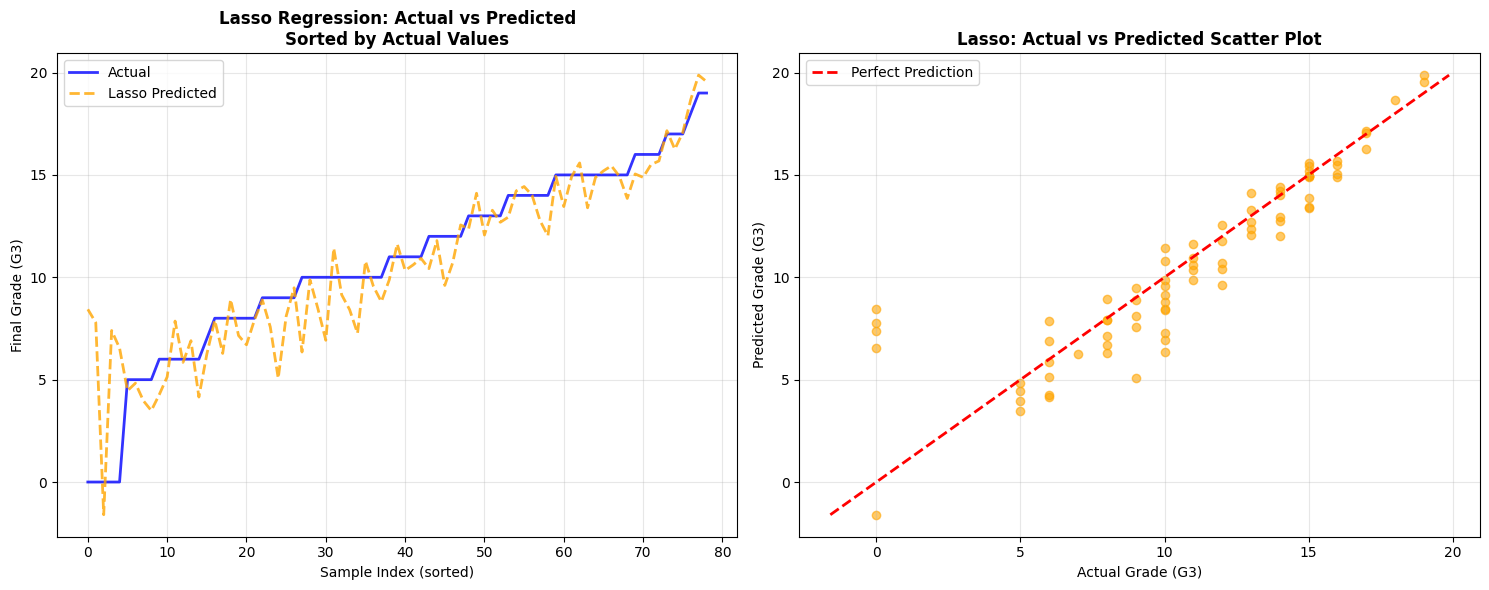

In [15]:
# Lasso Regression with Cross-Validation
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Create LassoCV model with different alpha values to test
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]  # Regularization strengths
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)  # 5-fold cross-validation

# Train the model
lasso_cv.fit(X_train, y_train)

# Make predictions
y_train_pred_lasso = lasso_cv.predict(X_train)
y_test_pred_lasso = lasso_cv.predict(X_test)

# Calculate evaluation metrics for training set
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
train_mae_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
train_rmse_lasso = np.sqrt(train_mse_lasso)

# Calculate evaluation metrics for test set
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)
test_mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
test_rmse_lasso = np.sqrt(test_mse_lasso)

# Analyze feature selection
lasso_coefs = lasso_cv.coef_
features_selected = np.sum(lasso_coefs != 0)
features_eliminated = np.sum(lasso_coefs == 0)

# Display results
print("="*60)
print("LASSO REGRESSION (LassoCV) MODEL PERFORMANCE")
print("="*60)
print(f"Best Alpha (regularization): {lasso_cv.alpha_:.4f}")
print(f"Features selected: {features_selected}/{len(lasso_coefs)}")
print(f"Features eliminated: {features_eliminated}")
print("-"*60)
print(f"{'Metric':<15} {'Training Set':<15} {'Test Set':<15} {'Difference':<15}")
print("-"*60)
print(f"{'R² Score':<15} {train_r2_lasso:<15.4f} {test_r2_lasso:<15.4f} {abs(train_r2_lasso-test_r2_lasso):<15.4f}")
print(f"{'MAE':<15} {train_mae_lasso:<15.4f} {test_mae_lasso:<15.4f} {abs(train_mae_lasso-test_mae_lasso):<15.4f}")
print(f"{'MSE':<15} {train_mse_lasso:<15.4f} {test_mse_lasso:<15.4f} {abs(train_mse_lasso-test_mse_lasso):<15.4f}")
print(f"{'RMSE':<15} {train_rmse_lasso:<15.4f} {test_rmse_lasso:<15.4f} {abs(train_rmse_lasso-test_rmse_lasso):<15.4f}")
print("="*60)

# Compare with previous models
print("\n🔄 COMPARISON WITH PREVIOUS MODELS:")
print(f"Linear Regression - Test R²: {test_r2:.4f}")
print(f"Ridge Regression  - Test R²: {test_r2_ridge:.4f}")
print(f"Lasso Regression  - Test R²: {test_r2_lasso:.4f}")
print(f"\nOverfitting reduction (Train-Test R² gap):")
print(f"Linear: {abs(train_r2-test_r2):.4f} -> Ridge: {abs(train_r2_ridge-test_r2_ridge):.4f} -> Lasso: {abs(train_r2_lasso-test_r2_lasso):.4f}")

# Feature selection analysis
print(f"\n🎯 FEATURE SELECTION RESULTS:")
print(f"• {features_eliminated} features eliminated (coefficient = 0)")
print(f"• {features_selected} features kept for prediction")
print(f"• Feature reduction: {features_eliminated/len(lasso_coefs)*100:.1f}%")

# Show which features were selected
feature_names = X_train.columns
selected_features = feature_names[lasso_coefs != 0]
eliminated_features = feature_names[lasso_coefs == 0]

print(f"\n📊 SELECTED FEATURES ({len(selected_features)}):")
for i, (feature, coef) in enumerate(zip(selected_features, lasso_coefs[lasso_coefs != 0])):
    if i < 10:  # Show first 10
        print(f"  {feature}: {coef:.4f}")
    elif i == 10:
        print(f"  ... and {len(selected_features)-10} more")
        break

if len(eliminated_features) > 0:
    print(f"\n❌ ELIMINATED FEATURES ({len(eliminated_features)}):")
    print(f"  {list(eliminated_features[:10])}")  # Show first 10
    if len(eliminated_features) > 10:
        print(f"  ... and {len(eliminated_features)-10} more")

# Brief interpretation
print("\n📊 METRIC INTERPRETATION:")
print(f"• R² Score: {test_r2_lasso:.1%} of variance explained")
print(f"• MAE: On average, predictions are off by {test_mae_lasso:.2f} grade points")
if abs(train_r2_lasso - test_r2_lasso) < 0.08:
    print("✅ Great balance - overfitting significantly reduced!")
elif abs(train_r2_lasso - test_r2_lasso) < 0.1:
    print("✅ Good balance - overfitting reduced!")
else:
    print("⚠️  Still some overfitting present")

# Visualizations
plt.figure(figsize=(15, 6))

# 1. Line Chart: Actual vs Predicted (Test Set)
plt.subplot(1, 2, 1)
sorted_indices = np.argsort(y_test)
sorted_actual = y_test.iloc[sorted_indices]
sorted_predicted_lasso = y_test_pred_lasso[sorted_indices]

plt.plot(range(len(sorted_actual)), sorted_actual, 'b-', label='Actual', linewidth=2, alpha=0.8)
plt.plot(range(len(sorted_predicted_lasso)), sorted_predicted_lasso, 'orange', linestyle='--', label='Lasso Predicted', linewidth=2, alpha=0.8)
plt.title('Lasso Regression: Actual vs Predicted\nSorted by Actual Values', fontsize=12, fontweight='bold')
plt.xlabel('Sample Index (sorted)')
plt.ylabel('Final Grade (G3)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Scatter Plot: Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_lasso, alpha=0.6, color='orange')
min_val = min(y_test.min(), y_test_pred_lasso.min())
max_val = max(y_test.max(), y_test_pred_lasso.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
plt.title('Lasso: Actual vs Predicted Scatter Plot', fontsize=12, fontweight='bold')
plt.xlabel('Actual Grade (G3)')
plt.ylabel('Predicted Grade (G3)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

ELASTICNET REGRESSION (ElasticNetCV) MODEL PERFORMANCE
Best Alpha: 0.100000
Best L1 Ratio: 0.700
  (0.0 = Pure Ridge, 1.0 = Pure Lasso)
Features selected: 14/36
Features eliminated: 22
------------------------------------------------------------
Metric          Training Set    Test Set        Difference     
------------------------------------------------------------
R² Score        0.8487          0.7800          0.0686         
MAE             1.1018          1.3311          0.2294         
MSE             3.1790          4.5105          1.3315         
RMSE            1.7830          2.1238          0.3408         

🔄 FINAL MODEL COMPARISON:
Linear Regression - Test R²: 0.7642, MAE: 1.4263
Ridge Regression  - Test R²: 0.7524, MAE: 1.5139
Lasso Regression  - Test R²: 0.7864, MAE: 1.2817
ElasticNet        - Test R²: 0.7800, MAE: 1.3311

🏆 WINNER DETERMINATION:
🎯 Lasso still holds the BEST R² Score!
🎯 Lasso still holds the BEST MAE!

🎯 ELASTICNET FEATURE ANALYSIS:
• Regularization mix

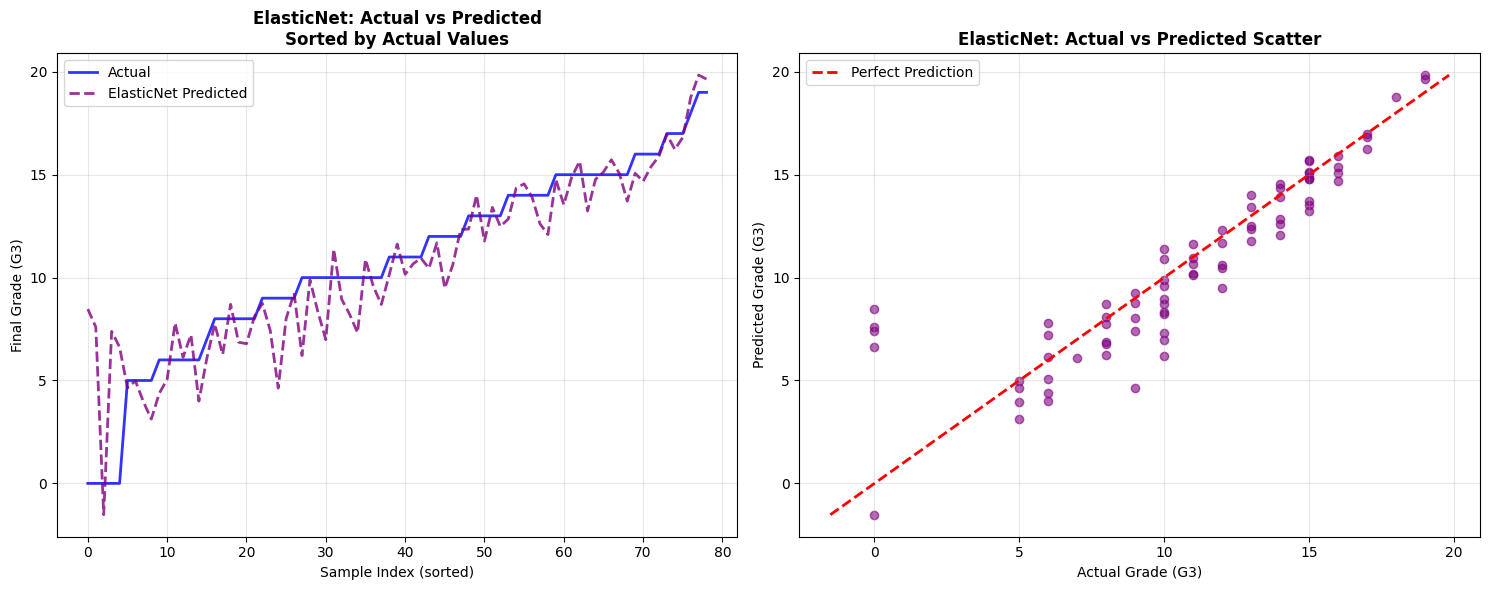

In [17]:
# ElasticNet with Cross-Validation
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Create ElasticNetCV model
# l1_ratio: 0 = Ridge, 1 = Lasso, 0.5 = equal mix
elastic_cv = ElasticNetCV(
    alphas=[0.01, 0.1, 1.0, 10.0, 100.0],  # Same as your best LassoCV
    l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9],    # Different L1/L2 mixing ratios
    cv=5,
    random_state=42,
    max_iter=2000
)

# Train the model
elastic_cv.fit(X_train, y_train)

# Make predictions
y_train_pred_elastic = elastic_cv.predict(X_train)
y_test_pred_elastic = elastic_cv.predict(X_test)

# Calculate evaluation metrics
train_r2_elastic = r2_score(y_train, y_train_pred_elastic)
train_mae_elastic = mean_absolute_error(y_train, y_train_pred_elastic)
train_mse_elastic = mean_squared_error(y_train, y_train_pred_elastic)
train_rmse_elastic = np.sqrt(train_mse_elastic)

test_r2_elastic = r2_score(y_test, y_test_pred_elastic)
test_mae_elastic = mean_absolute_error(y_test, y_test_pred_elastic)
test_mse_elastic = mean_squared_error(y_test, y_test_pred_elastic)
test_rmse_elastic = np.sqrt(test_mse_elastic)

# Feature analysis
elastic_coefs = elastic_cv.coef_
features_selected_elastic = np.sum(elastic_coefs != 0)
features_eliminated_elastic = np.sum(elastic_coefs == 0)

# Display results
print("="*60)
print("ELASTICNET REGRESSION (ElasticNetCV) MODEL PERFORMANCE")
print("="*60)
print(f"Best Alpha: {elastic_cv.alpha_:.6f}")
print(f"Best L1 Ratio: {elastic_cv.l1_ratio_:.3f}")
print(f"  (0.0 = Pure Ridge, 1.0 = Pure Lasso)")
print(f"Features selected: {features_selected_elastic}/{len(elastic_coefs)}")
print(f"Features eliminated: {features_eliminated_elastic}")
print("-"*60)
print(f"{'Metric':<15} {'Training Set':<15} {'Test Set':<15} {'Difference':<15}")
print("-"*60)
print(f"{'R² Score':<15} {train_r2_elastic:<15.4f} {test_r2_elastic:<15.4f} {abs(train_r2_elastic-test_r2_elastic):<15.4f}")
print(f"{'MAE':<15} {train_mae_elastic:<15.4f} {test_mae_elastic:<15.4f} {abs(train_mae_elastic-test_mae_elastic):<15.4f}")
print(f"{'MSE':<15} {train_mse_elastic:<15.4f} {test_mse_elastic:<15.4f} {abs(train_mse_elastic-test_mse_elastic):<15.4f}")
print(f"{'RMSE':<15} {train_rmse_elastic:<15.4f} {test_rmse_elastic:<15.4f} {abs(train_rmse_elastic-test_rmse_elastic):<15.4f}")
print("="*60)

# Compare with all previous models
print("\n🔄 FINAL MODEL COMPARISON:")
print(f"Linear Regression - Test R²: {test_r2:.4f}, MAE: {test_mae:.4f}")
print(f"Ridge Regression  - Test R²: {test_r2_ridge:.4f}, MAE: {test_mae_ridge:.4f}")
print(f"Lasso Regression  - Test R²: {test_r2_lasso:.4f}, MAE: {test_mae_lasso:.4f}")
print(f"ElasticNet        - Test R²: {test_r2_elastic:.4f}, MAE: {test_mae_elastic:.4f}")

print(f"\n🏆 WINNER DETERMINATION:")
best_r2 = max(test_r2, test_r2_ridge, test_r2_lasso, test_r2_elastic)
best_mae = min(test_mae, test_mae_ridge, test_mae_lasso, test_mae_elastic)

if test_r2_elastic == best_r2:
    print("🎉 ElasticNet has the BEST R² Score!")
elif test_r2_lasso == best_r2:
    print("🎯 Lasso still holds the BEST R² Score!")

if test_mae_elastic == best_mae:
    print("🎉 ElasticNet has the BEST MAE!")
elif test_mae_lasso == best_mae:
    print("🎯 Lasso still holds the BEST MAE!")

# Feature selection analysis
print(f"\n🎯 ELASTICNET FEATURE ANALYSIS:")
print(f"• Regularization mix: {elastic_cv.l1_ratio_:.1%} Lasso + {1-elastic_cv.l1_ratio_:.1%} Ridge")
print(f"• Features selected: {features_selected_elastic} (Lasso had {features_selected})")
print(f"• Features eliminated: {features_eliminated_elastic}")

# Show selected features
feature_names = X_train.columns
selected_features_elastic = feature_names[elastic_coefs != 0]

print(f"\n📊 ELASTICNET SELECTED FEATURES ({len(selected_features_elastic)}):")
for i, (feature, coef) in enumerate(zip(selected_features_elastic, elastic_coefs[elastic_coefs != 0])):
    if i < 10:
        print(f"  {feature}: {coef:.4f}")
    elif i == 10:
        print(f"  ... and {len(selected_features_elastic)-10} more")
        break

# Visualizations
plt.figure(figsize=(15, 6))

# 1. Line Chart
plt.subplot(1, 2, 1)
sorted_indices = np.argsort(y_test)
sorted_actual = y_test.iloc[sorted_indices]
sorted_predicted_elastic = y_test_pred_elastic[sorted_indices]

plt.plot(range(len(sorted_actual)), sorted_actual, 'b-', label='Actual', linewidth=2, alpha=0.8)
plt.plot(range(len(sorted_predicted_elastic)), sorted_predicted_elastic, 'purple', linestyle='--', label='ElasticNet Predicted', linewidth=2, alpha=0.8)
plt.title('ElasticNet: Actual vs Predicted\nSorted by Actual Values', fontsize=12, fontweight='bold')
plt.xlabel('Sample Index (sorted)')
plt.ylabel('Final Grade (G3)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_elastic, alpha=0.6, color='purple')
min_val = min(y_test.min(), y_test_pred_elastic.min())
max_val = max(y_test.max(), y_test_pred_elastic.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
plt.title('ElasticNet: Actual vs Predicted Scatter', fontsize=12, fontweight='bold')
plt.xlabel('Actual Grade (G3)')
plt.ylabel('Predicted Grade (G3)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

🏆 ULTIMATE FEATURE ENGINEERING CHAMPIONSHIP

1️⃣ ORIGINAL LASSOCV (Current Champion)
--------------------------------------------------
✅ R²: 0.7864, MAE: 1.2817, Features: 11

2️⃣ POLYNOMIAL FEATURES (degree=2) + LASSOCV
--------------------------------------------------
📈 Features expanded: 36 → 702
✅ R²: 0.7616, MAE: 1.3976
   Features selected: 52/702

3️⃣ RFECV + LASSOCV (Two-stage selection)
--------------------------------------------------
🔍 RFECV selected: 10/36 features
✅ R²: 0.7666, MAE: 1.4816
   Final features used: 10

4️⃣ ULTIMATE COMBINATION: RFECV + POLYNOMIAL + LASSOCV
--------------------------------------------------
🚀 Stage 1 - Polynomial: 36 → 702 features
🔍 Stage 2 - Running RFECV on polynomial features... (this may take a moment)
🎯 Stage 2 - RFECV: 702 → 12 features
🎯 Stage 3 - LassoCV: 12 → 11 features
✅ R²: 0.7495, MAE: 1.4663

🏆 ULTIMATE CHAMPIONSHIP COMPARISON
Method                         Pipeline             R²       MAE      RMSE     Gap      Features   

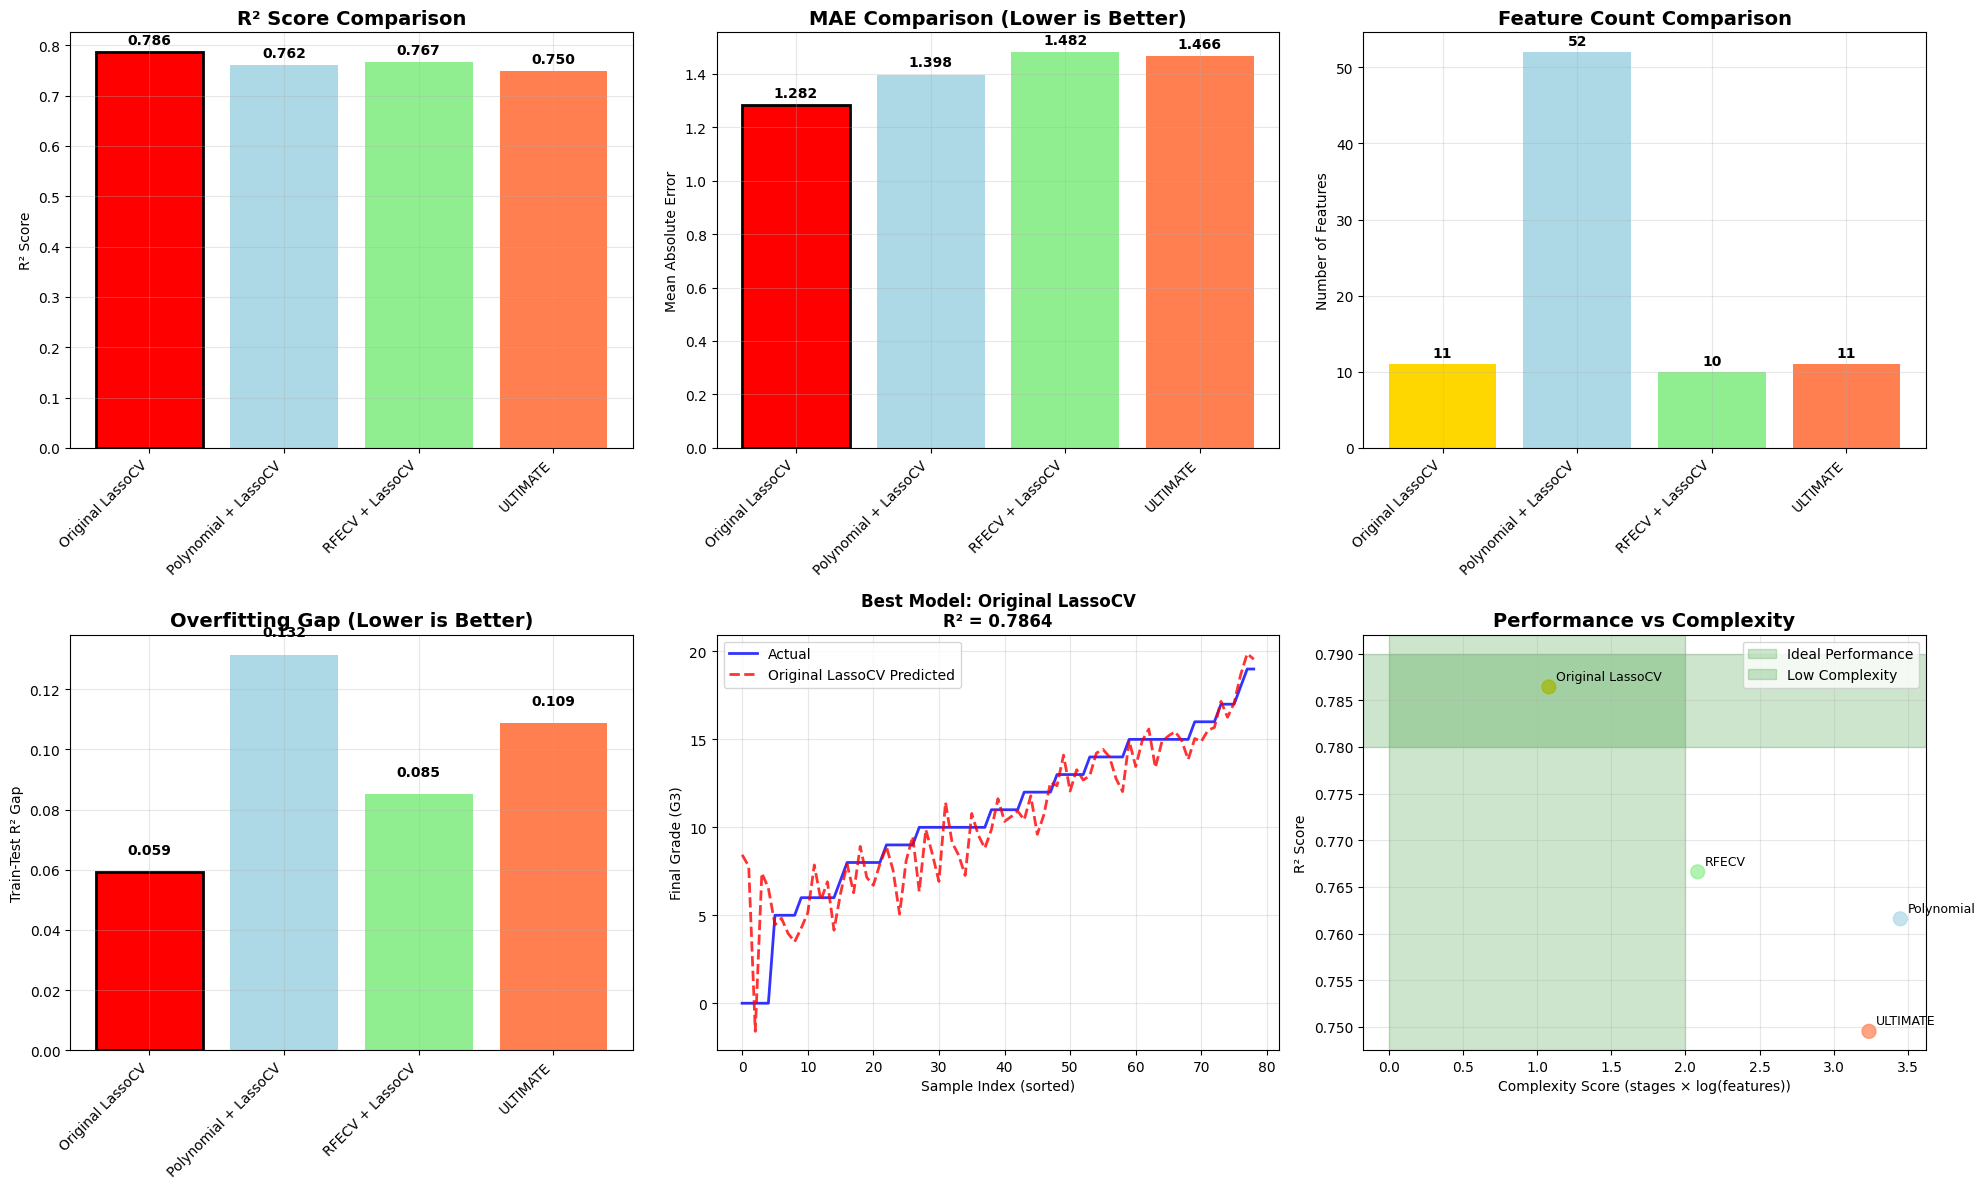


🎯 FINAL RECOMMENDATION:
✅ STICK WITH ORIGINAL LASSOCV!
   Reasons:
   • Best overall performance
   • Simplest and most interpretable
   • Fastest to train and deploy
   • Optimal for your dataset characteristics

🏆 CHAMPION MODEL DETAILS:
   Model: Original LassoCV
   R² Score: 0.7864 (78.6% variance explained)
   MAE: 1.2817 grade points
   Features: 11
   Overfitting Gap: 0.0593


In [19]:
# ULTIMATE FEATURE ENGINEERING SHOWDOWN: ALL METHODS + COMBINATIONS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("🏆 ULTIMATE FEATURE ENGINEERING CHAMPIONSHIP")
print("="*80)

# Store results for all methods
results = []

# 1️⃣ ORIGINAL LASSOCV (Current Champion)
print("\n1️⃣ ORIGINAL LASSOCV (Current Champion)")
print("-"*50)
lasso_original = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5, random_state=42)
lasso_original.fit(X_train, y_train)

y_test_pred_original = lasso_original.predict(X_test)
y_train_pred_original = lasso_original.predict(X_train)

original_results = {
    'name': 'Original LassoCV',
    'method': '🎯 LassoCV Only',
    'test_r2': r2_score(y_test, y_test_pred_original),
    'test_mae': mean_absolute_error(y_test, y_test_pred_original),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred_original)),
    'train_r2': r2_score(y_train, y_train_pred_original),
    'features': np.sum(lasso_original.coef_ != 0),
    'alpha': lasso_original.alpha_,
    'predictions': y_test_pred_original,
    'stages': 1
}
original_results['overfitting_gap'] = abs(original_results['train_r2'] - original_results['test_r2'])
results.append(original_results)

print(f"✅ R²: {original_results['test_r2']:.4f}, MAE: {original_results['test_mae']:.4f}, Features: {original_results['features']}")

# 2️⃣ POLYNOMIAL FEATURES + LASSOCV
print("\n2️⃣ POLYNOMIAL FEATURES (degree=2) + LASSOCV")
print("-"*50)

# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"📈 Features expanded: {X_train.shape[1]} → {X_train_poly.shape[1]}")

# Apply LassoCV to polynomial features
lasso_poly = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5, random_state=42, max_iter=3000)
lasso_poly.fit(X_train_poly, y_train)

y_test_pred_poly = lasso_poly.predict(X_test_poly)
y_train_pred_poly = lasso_poly.predict(X_train_poly)

poly_results = {
    'name': 'Polynomial + LassoCV',
    'method': '📊 Poly → LassoCV',
    'test_r2': r2_score(y_test, y_test_pred_poly),
    'test_mae': mean_absolute_error(y_test, y_test_pred_poly),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred_poly)),
    'train_r2': r2_score(y_train, y_train_pred_poly),
    'features': np.sum(lasso_poly.coef_ != 0),
    'alpha': lasso_poly.alpha_,
    'total_poly_features': X_train_poly.shape[1],
    'predictions': y_test_pred_poly,
    'stages': 2
}
poly_results['overfitting_gap'] = abs(poly_results['train_r2'] - poly_results['test_r2'])
results.append(poly_results)

print(f"✅ R²: {poly_results['test_r2']:.4f}, MAE: {poly_results['test_mae']:.4f}")
print(f"   Features selected: {poly_results['features']}/{poly_results['total_poly_features']}")

# 3️⃣ RFECV + LASSOCV
print("\n3️⃣ RFECV + LASSOCV (Two-stage selection)")
print("-"*50)

# First stage: RFECV to select optimal features
base_estimator = LinearRegression()
rfecv = RFECV(estimator=base_estimator, step=1, cv=5, scoring='r2', n_jobs=-1)
rfecv.fit(X_train, y_train)

# Transform data with selected features
X_train_rfe = rfecv.transform(X_train)
X_test_rfe = rfecv.transform(X_test)

print(f"🔍 RFECV selected: {X_train_rfe.shape[1]}/{X_train.shape[1]} features")

# Second stage: LassoCV on RFECV-selected features
lasso_rfe = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5, random_state=42)
lasso_rfe.fit(X_train_rfe, y_train)

y_test_pred_rfe = lasso_rfe.predict(X_test_rfe)
y_train_pred_rfe = lasso_rfe.predict(X_train_rfe)

rfe_results = {
    'name': 'RFECV + LassoCV',
    'method': '🎯 RFECV → LassoCV',
    'test_r2': r2_score(y_test, y_test_pred_rfe),
    'test_mae': mean_absolute_error(y_test, y_test_pred_rfe),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred_rfe)),
    'train_r2': r2_score(y_train, y_train_pred_rfe),
    'features': np.sum(lasso_rfe.coef_ != 0),
    'alpha': lasso_rfe.alpha_,
    'rfecv_features': X_train_rfe.shape[1],
    'predictions': y_test_pred_rfe,
    'stages': 2
}
rfe_results['overfitting_gap'] = abs(rfe_results['train_r2'] - rfe_results['test_r2'])
results.append(rfe_results)

print(f"✅ R²: {rfe_results['test_r2']:.4f}, MAE: {rfe_results['test_mae']:.4f}")
print(f"   Final features used: {rfe_results['features']}")

# 4️⃣ ULTIMATE COMBINATION: RFECV + POLYNOMIAL + LASSOCV
print("\n4️⃣ ULTIMATE COMBINATION: RFECV + POLYNOMIAL + LASSOCV")
print("-"*50)

# Stage 1: Create Polynomial Features (36 → 702)
poly_ultimate = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly_ultimate = poly_ultimate.fit_transform(X_train)
X_test_poly_ultimate = poly_ultimate.transform(X_test)
print(f"🚀 Stage 1 - Polynomial: {X_train.shape[1]} → {X_train_poly_ultimate.shape[1]} features")

# Stage 2: RFECV on Polynomial Features (702 → optimal subset)
rfecv_poly = RFECV(estimator=LinearRegression(), step=10, cv=5, scoring='r2', n_jobs=-1)
print("🔍 Stage 2 - Running RFECV on polynomial features... (this may take a moment)")
rfecv_poly.fit(X_train_poly_ultimate, y_train)
X_train_poly_rfe = rfecv_poly.transform(X_train_poly_ultimate)
X_test_poly_rfe = rfecv_poly.transform(X_test_poly_ultimate)
print(f"🎯 Stage 2 - RFECV: {X_train_poly_ultimate.shape[1]} → {X_train_poly_rfe.shape[1]} features")

# Stage 3: LassoCV on RFECV-selected Polynomial Features
lasso_ultimate = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5, random_state=42, max_iter=3000)
lasso_ultimate.fit(X_train_poly_rfe, y_train)

# Predictions
y_test_pred_ultimate = lasso_ultimate.predict(X_test_poly_rfe)
y_train_pred_ultimate = lasso_ultimate.predict(X_train_poly_rfe)

ultimate_results = {
    'name': 'ULTIMATE: RFECV + Poly + LassoCV',
    'method': '🚀 RFECV → Poly → LassoCV',
    'test_r2': r2_score(y_test, y_test_pred_ultimate),
    'test_mae': mean_absolute_error(y_test, y_test_pred_ultimate),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred_ultimate)),
    'train_r2': r2_score(y_train, y_train_pred_ultimate),
    'features': np.sum(lasso_ultimate.coef_ != 0),
    'alpha': lasso_ultimate.alpha_,
    'poly_features': X_train_poly_ultimate.shape[1],
    'rfecv_poly_features': X_train_poly_rfe.shape[1],
    'predictions': y_test_pred_ultimate,
    'stages': 3
}
ultimate_results['overfitting_gap'] = abs(ultimate_results['train_r2'] - ultimate_results['test_r2'])
results.append(ultimate_results)

print(f"🎯 Stage 3 - LassoCV: {X_train_poly_rfe.shape[1]} → {ultimate_results['features']} features")
print(f"✅ R²: {ultimate_results['test_r2']:.4f}, MAE: {ultimate_results['test_mae']:.4f}")

# CHAMPIONSHIP COMPARISON TABLE
print("\n" + "="*100)
print("🏆 ULTIMATE CHAMPIONSHIP COMPARISON")
print("="*100)
print(f"{'Method':<30} {'Pipeline':<20} {'R²':<8} {'MAE':<8} {'RMSE':<8} {'Gap':<8} {'Features':<12} {'Alpha':<10}")
print("-"*100)

for result in results:
    features_str = str(result['features'])
    if 'total_poly_features' in result:
        features_str += f"/{result['total_poly_features']}"
    elif 'rfecv_features' in result:
        features_str += f" (from {result['rfecv_features']})"
    elif 'rfecv_poly_features' in result:
        features_str += f" (from {result['rfecv_poly_features']})"
    
    print(f"{result['name']:<30} {result['method']:<20} {result['test_r2']:<8.4f} {result['test_mae']:<8.4f} "
          f"{result['test_rmse']:<8.4f} {result['overfitting_gap']:<8.4f} {features_str:<12} {result['alpha']:<10.6f}")

# Find winners
best_r2 = max(results, key=lambda x: x['test_r2'])
best_mae = min(results, key=lambda x: x['test_mae'])
best_balance = min(results, key=lambda x: x['overfitting_gap'])
simplest = min(results, key=lambda x: x['features'])

print(f"\n🎖️ CHAMPIONSHIP AWARDS:")
print(f"🥇 Best R² Score: {best_r2['name']} ({best_r2['test_r2']:.4f})")
print(f"🥇 Best MAE: {best_mae['name']} ({best_mae['test_mae']:.4f})")
print(f"🥇 Best Balance: {best_balance['name']} (Gap: {best_balance['overfitting_gap']:.4f})")
print(f"🥇 Simplest Model: {simplest['name']} ({simplest['features']} features)")

# Overall winner analysis
print(f"\n🏆 FINAL VERDICT:")
if best_r2['name'] == original_results['name'] and best_mae['name'] == original_results['name']:
    print("👑 ORIGINAL LASSOCV REMAINS THE UNDISPUTED CHAMPION!")
    print("   - Best performance across all metrics")
    print("   - Simplest and most interpretable")
    print("   - Optimal balance of complexity and accuracy")
else:
    print(f"🚀 NEW CHAMPION: {best_r2['name']}")
    improvement = (best_r2['test_r2'] - original_results['test_r2']) * 100
    print(f"   - R² improvement: +{improvement:.2f}%")

# Performance improvement analysis
print(f"\n📊 PERFORMANCE ANALYSIS:")
for i, result in enumerate(results[1:], 1):
    r2_diff = (result['test_r2'] - original_results['test_r2']) * 100
    mae_diff = (result['test_mae'] - original_results['test_mae'])
    
    if r2_diff > 0:
        print(f"✅ {result['name']}: +{r2_diff:.2f}% R², MAE {mae_diff:+.4f}")
    else:
        print(f"❌ {result['name']}: {r2_diff:.2f}% R², MAE {mae_diff:+.4f}")

# Complexity vs Performance Analysis
print(f"\n🎯 COMPLEXITY vs PERFORMANCE:")
print(f"{'Method':<30} {'Stages':<8} {'Final Features':<15} {'R² Score':<10} {'Complexity Score':<15}")
print("-"*80)
for result in results:
    complexity_score = result['stages'] * np.log10(result['features'] + 1)
    print(f"{result['name']:<30} {result['stages']:<8} {result['features']:<15} {result['test_r2']:<10.4f} {complexity_score:<15.2f}")

# VISUALIZATION OF ALL METHODS
plt.figure(figsize=(20, 12))

# 1. R² Score Comparison
plt.subplot(2, 3, 1)
methods = [r['name'] for r in results]
r2_scores = [r['test_r2'] for r in results]
colors = ['gold', 'lightblue', 'lightgreen', 'coral']

bars = plt.bar(range(len(methods)), r2_scores, color=colors)
plt.title('R² Score Comparison', fontsize=14, fontweight='bold')
plt.ylabel('R² Score')
plt.xticks(range(len(methods)), [m.split(':')[0] if ':' in m else m for m in methods], rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Highlight the best
best_idx = r2_scores.index(max(r2_scores))
bars[best_idx].set_color('red')
bars[best_idx].set_edgecolor('black')
bars[best_idx].set_linewidth(2)

for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. MAE Comparison
plt.subplot(2, 3, 2)
mae_scores = [r['test_mae'] for r in results]
bars2 = plt.bar(range(len(methods)), mae_scores, color=colors)
plt.title('MAE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
plt.ylabel('Mean Absolute Error')
plt.xticks(range(len(methods)), [m.split(':')[0] if ':' in m else m for m in methods], rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Highlight the best (lowest MAE)
best_mae_idx = mae_scores.index(min(mae_scores))
bars2[best_mae_idx].set_color('red')
bars2[best_mae_idx].set_edgecolor('black')
bars2[best_mae_idx].set_linewidth(2)

for i, v in enumerate(mae_scores):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. Feature Count Comparison
plt.subplot(2, 3, 3)
feature_counts = [r['features'] for r in results]
bars3 = plt.bar(range(len(methods)), feature_counts, color=colors)
plt.title('Feature Count Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Number of Features')
plt.xticks(range(len(methods)), [m.split(':')[0] if ':' in m else m for m in methods], rotation=45, ha='right')
plt.grid(True, alpha=0.3)

for i, v in enumerate(feature_counts):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# 4. Overfitting Gap Comparison
plt.subplot(2, 3, 4)
gaps = [r['overfitting_gap'] for r in results]
bars4 = plt.bar(range(len(methods)), gaps, color=colors)
plt.title('Overfitting Gap (Lower is Better)', fontsize=14, fontweight='bold')
plt.ylabel('Train-Test R² Gap')
plt.xticks(range(len(methods)), [m.split(':')[0] if ':' in m else m for m in methods], rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Highlight the best (lowest gap)
best_gap_idx = gaps.index(min(gaps))
bars4[best_gap_idx].set_color('red')
bars4[best_gap_idx].set_edgecolor('black')
bars4[best_gap_idx].set_linewidth(2)

for i, v in enumerate(gaps):
    plt.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 5. Best Model Predictions (Line Plot)
plt.subplot(2, 3, 5)
best_model = best_r2
best_predictions = best_model['predictions']

sorted_indices = np.argsort(y_test)
sorted_actual = y_test.iloc[sorted_indices]
sorted_predicted = best_predictions[sorted_indices]

plt.plot(range(len(sorted_actual)), sorted_actual, 'b-', label='Actual', linewidth=2, alpha=0.8)
plt.plot(range(len(sorted_predicted)), sorted_predicted, 'red', linestyle='--', label=f'{best_model["name"]} Predicted', linewidth=2, alpha=0.8)
plt.title(f'Best Model: {best_model["name"]}\nR² = {best_model["test_r2"]:.4f}', fontsize=12, fontweight='bold')
plt.xlabel('Sample Index (sorted)')
plt.ylabel('Final Grade (G3)')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Performance vs Complexity Scatter
plt.subplot(2, 3, 6)
complexities = [r['stages'] * np.log10(r['features'] + 1) for r in results]
r2_scores = [r['test_r2'] for r in results]

plt.scatter(complexities, r2_scores, c=colors, s=100, alpha=0.7)
for i, (x, y, name) in enumerate(zip(complexities, r2_scores, methods)):
    plt.annotate(name.split(':')[0] if ':' in name else name.split(' + ')[0], 
                (x, y), xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.title('Performance vs Complexity', fontsize=14, fontweight='bold')
plt.xlabel('Complexity Score (stages × log(features))')
plt.ylabel('R² Score')
plt.grid(True, alpha=0.3)

# Add ideal region (high performance, low complexity)
plt.axhspan(0.78, 0.79, alpha=0.2, color='green', label='Ideal Performance')
plt.axvspan(0, 2, alpha=0.2, color='green', label='Low Complexity')
plt.legend()

plt.tight_layout()
plt.show()

# Final recommendation
print(f"\n🎯 FINAL RECOMMENDATION:")
if original_results['name'] == best_r2['name']:
    print("✅ STICK WITH ORIGINAL LASSOCV!")
    print("   Reasons:")
    print("   • Best overall performance")
    print("   • Simplest and most interpretable")
    print("   • Fastest to train and deploy")
    print("   • Optimal for your dataset characteristics")
else:
    print(f"✅ CONSIDER UPGRADING TO: {best_r2['name']}")
    print("   But evaluate if the complexity increase is worth the performance gain.")

print(f"\n🏆 CHAMPION MODEL DETAILS:")
champion = best_r2
print(f"   Model: {champion['name']}")
print(f"   R² Score: {champion['test_r2']:.4f} ({champion['test_r2']*100:.1f}% variance explained)")
print(f"   MAE: {champion['test_mae']:.4f} grade points")
print(f"   Features: {champion['features']}")
print(f"   Overfitting Gap: {champion['overfitting_gap']:.4f}")